In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

path_directory = "/home/ap23002/deep-learning-2024/project1/msl-images/"
#path_directory = "/content/drive/MyDrive/QMUL/Sem 2/Machine Learning/project1/msl-images/"

#images
image_classes = np.loadtxt(path_directory + "msl_synset_words-indexed.txt", dtype=str,delimiter=',')
image_test = np.loadtxt(path_directory + "test-calibrated-shuffled.txt", dtype=str,delimiter=' ')
image_train = np.loadtxt(path_directory + "train-calibrated-shuffled.txt", dtype=str,delimiter=' ')
image_val = np.loadtxt(path_directory + "val-calibrated-shuffled.txt", dtype=str,delimiter=' ')


#dataframes
df_classes = pd.DataFrame(image_classes, columns=['filename','class'])
df_test = pd.DataFrame(image_test, columns=['filename','class'])
df_train = pd.DataFrame(image_train, columns=['filename','class'])
df_val = pd.DataFrame(image_val, columns=['filename','class'])

In [ ]:
BatchSize = 100
class_name =[f'{x}' for x in range(0,25)]
print(class_name)

#load the training image data
idg = ImageDataGenerator(rescale=1./255.)
train_ds = idg.flow_from_dataframe(dataframe=df_train
                                   , directory='/home/ap23002/deep-learning-2024/project1/msl-images/'
                                   , batch_size=BatchSize
                                  , classes=class_name)

test_ds = idg.flow_from_dataframe(dataframe=df_test
                                   , directory='/home/ap23002/deep-learning-2024/project1/msl-images/'
                                   , batch_size=BatchSize
                                 ,classes=class_name)

val_ds = idg.flow_from_dataframe(dataframe=df_val
                                   , directory='/home/ap23002/deep-learning-2024/project1/msl-images/'
                                   , batch_size=BatchSize
                                ,classes=class_name)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24']
Found 3746 validated image filenames belonging to 25 classes.
Found 1305 validated image filenames belonging to 25 classes.
Found 1640 validated image filenames belonging to 25 classes.


# Exploring Dataset

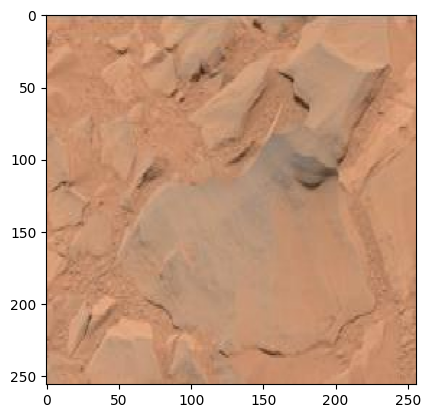

In [ ]:
#plot an image
plt.figure()
plt.imshow(train_ds[0][0][1])
plt.show()

In [ ]:
print(image_classes)
#train_ds[the batchnumber]
    #[column: 0=probability of class in each pixel from file, 1=true class]
    #[the number within the batch]
print(train_ds[5][1][1])
print(val_ds[5][1][1])
print(train_ds[0][1][0])

[['0' 'apxs']
 ['1' 'apxs cal target']
 ['2' 'chemcam cal target']
 ['3' 'chemin inlet open']
 ['4' 'drill']
 ['5' 'drill holes']
 ['6' 'drt front']
 ['7' 'drt side']
 ['8' 'ground']
 ['9' 'horizon']
 ['10' 'inlet']
 ['11' 'mahli']
 ['12' 'mahli cal target']
 ['13' 'mastcam']
 ['14' 'mastcam cal target']
 ['15' 'observation tray']
 ['16' 'portion box']
 ['17' 'portion tube']
 ['18' 'portion tube opening']
 ['19' 'rems uv sensor']
 ['20' 'rover rear deck']
 ['21' 'scoop']
 ['22' 'sun']
 ['23' 'turret']
 ['24' 'wheel']]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0.]


In [ ]:
#figure outt he shape
print(train_ds[0][0][0].shape)

print(train_ds[0][0][0].shape[0])#x-axis pixels
print(train_ds[0][0][0].shape[1])#y-axis pixel
print(train_ds[0][0][0].shape[2])#RGB colour channels as it print out 3


# Training Model

In [ ]:
#train train_ds in a model
#figure out size of image 12x12 pixel methinks

Nepochs = 10
DropoutValue = 0.5

xpix = train_ds[0][0][0].shape[0]
ypix = train_ds[0][0][0].shape[1]
zpix = train_ds[0][0][0].shape[2]#colour channels

print(xpix)
print(ypix)
print(zpix)

model = keras.models.Sequential()

model.add(keras.layers.Conv2D(32,(3,3),padding='same',activation = 'relu', input_shape= (xpix, ypix, zpix)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Dropout(DropoutValue))

model.add(keras.layers.Conv2D(32*2, (3, 3),padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Dropout(DropoutValue))

model.add(keras.layers.Conv2D(32*4, (3, 3),padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Dropout(DropoutValue))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32*5, activation='relu'))
model.add(keras.layers.Dropout(DropoutValue))
model.add(keras.layers.Dense(25, activation='softmax'))#ensure no. of classes matches wiith the generator




print("Input data ")
print("Dropout values       = ", DropoutValue)
print("Leaky relu parameter =  0.1")
#print("ValidationSplit      = ", ValidationSplit)
print("BatchSize            = ", BatchSize)
print("Nepochs              = ", Nepochs, "\n")
print("N(train)             = ", len(df_train))
print("N(test)              = ", len(df_test))
model.summary()

loss_fn = keras.losses.CategoricalCrossentropy()#bc theyre one part categorisation

model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])
history  = model.fit(train_ds,validation_data=val_ds, epochs=Nepochs)

256
256
3
Input data 
Dropout values       =  0.5
Leaky relu parameter =  0.1
BatchSize            =  100
Nepochs              =  10 

N(train)             =  3746
N(test)              =  1305
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 128, 128, 32)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 64)       0   

history keys =  dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Display the evolution of the accuracy as a function of the training epoch


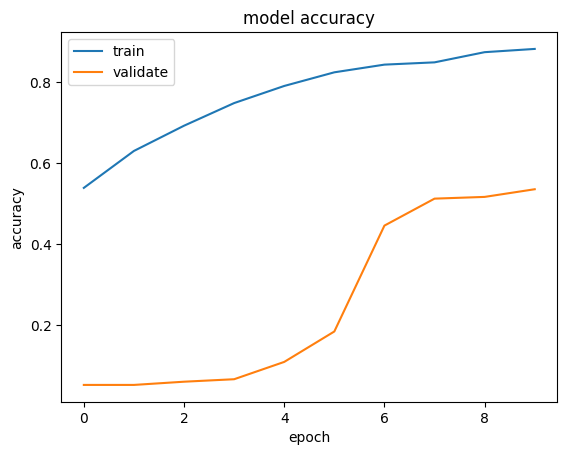


Display the evolution of the loss as a function of the training epoch


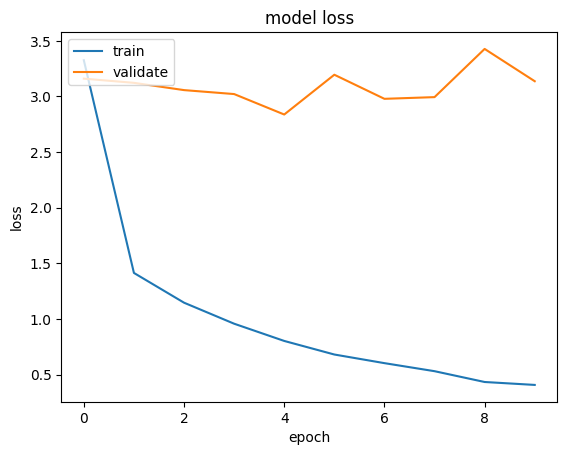


Performance summary (on test data):
14/14 - 7s - loss: 2.4026 - accuracy: 0.3479 - 7s/epoch - 530ms/step
	loss = 2.403
	accuracy = 0.348


In [ ]:
print("history keys = ", history.history.keys())

print("\n\033[1mDisplay the evolution of the accuracy as a function of the training epoch\033[0m")


plt.plot(history.history['accuracy']) # 'accuracy'
plt.plot(history.history['val_accuracy']) # 'val_accuracy'
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()
plt.clf()



print("\n\033[1mDisplay the evolution of the loss as a function of the training epoch\033[0m")


# summarize history for loss
plt.plot(history.history['loss']) # 'loss'
plt.plot(history.history['val_loss']) # 'val_loss'
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()



# having finished training the model, use this to evaluate the performance on a sample of test data
print("\n\033[1mPerformance summary (on test data):\033[0m")
loss, acc = model.evaluate(test_ds, verbose=2) # remember to use test set!
print("\tloss = {:5.3f}\n\taccuracy = {:5.3f}".format(loss, acc))


# Plot the 25 Different Classes

Predictions from the network against the true class. Taken from a batch of 25

test_predict= model.predict(test_ds[batch][image or true class])


Predicted class = np.argmax(test_predict[0])

True class = np.argmax(test_ds[0][1][0])



14/14 [==============================] - 6s 420ms/step
[0.02805589 0.01559448 0.02394604 0.04139226 0.03253716 0.04223068
 0.01101643 0.0202181  0.12382983 0.10735834 0.07905895 0.03013718
 0.02913848 0.03733552 0.0450494  0.04002326 0.02130775 0.02154206
 0.01677836 0.02577328 0.05659252 0.0409472  0.01982922 0.04506123
 0.04524628]
Predicted class by network = 8
True Class= 6


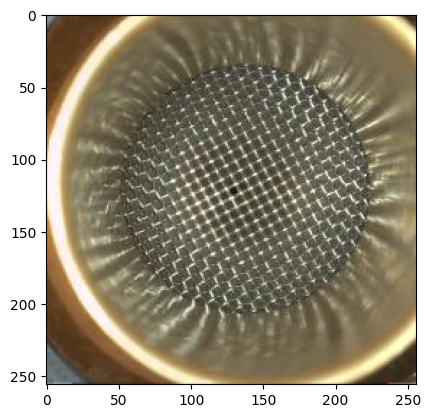

In [ ]:
#testing
test_predict = model.predict(test_ds)

print(test_predict[26])#changing number gives diff image each time
print('Predicted class by network =', np.argmax(test_predict[0]))
print('True Class=',np.argmax(test_ds[0][1][0]))

plt.figure()
plt.imshow(test_ds[0][0][1])
plt.show()

41/41 [==============================] - 7s 179ms/step


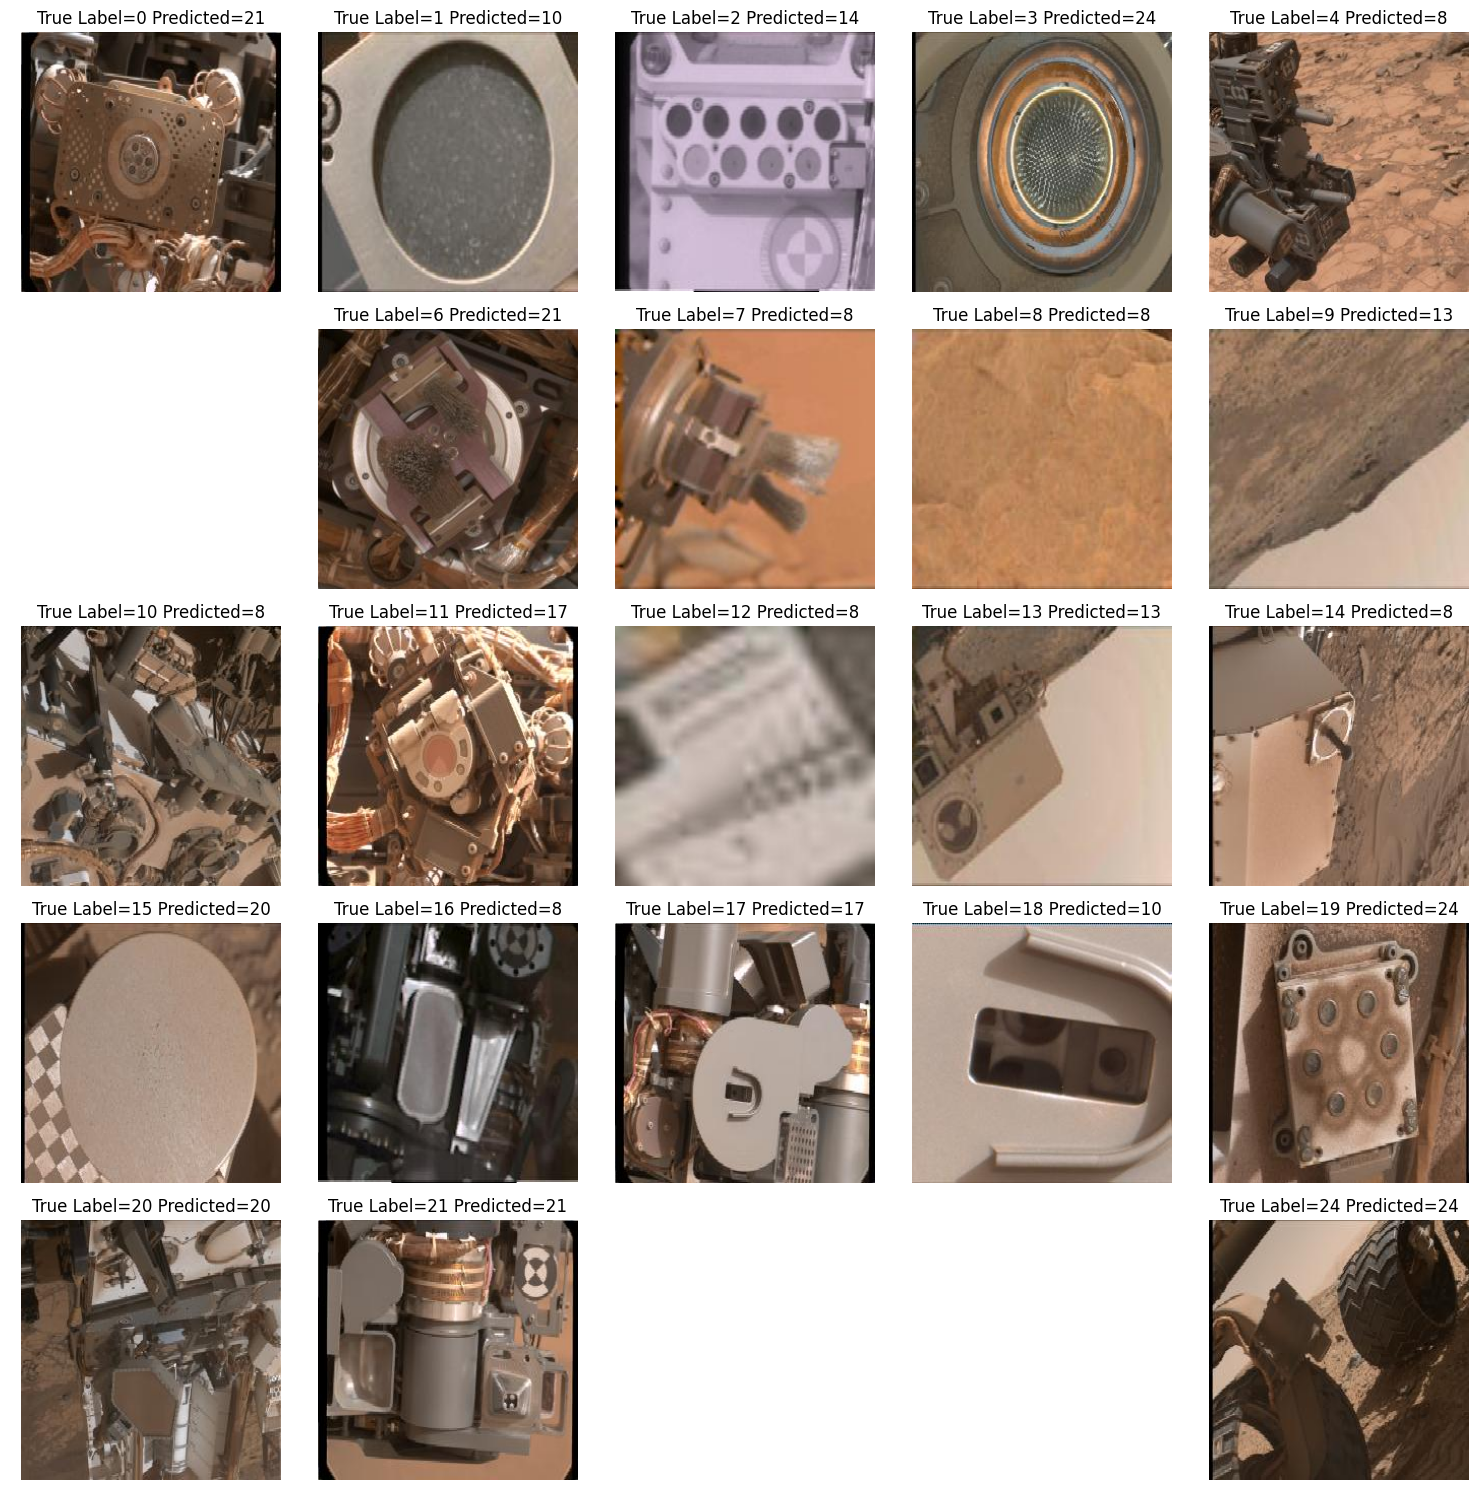

In [ ]:
test_true_class = []
test_images = []

# test data into list
for i in range(len(test_ds)):
    x = test_ds[i][0]  # image file
    y = test_ds[i][1]  # true class
    test_true_class.append(y)
    test_images.append(x)

# Concatenate lists
true_class_con = np.concatenate(test_true_class)
images_con = np.concatenate(test_images)

test_predict = model.predict(images_con)

# Create a 5x5 matrix
fig, axes = plt.subplots(5, 5, figsize=(15, 15))

for i in range(25):
    row = i // 5
    col = i % 5
    for j in range(len(images_con)):
        true_class = np.argmax(true_class_con[j])
        if true_class == i:
            predicted_class = np.argmax(test_predict[j])
            Title = 'True Label=' + str(true_class) + ' Predicted=' + str(predicted_class)
            axes[row, col].imshow(images_con[j])
            axes[row, col].set_title(Title)
            axes[row, col].axis("off")
            break
    else:
        axes[row, col].axis("off")#empty space in the thingy

plt.tight_layout()
plt.show()

In [ ]:
print(image_classes)

[['0' 'apxs']
 ['1' 'apxs cal target']
 ['2' 'chemcam cal target']
 ['3' 'chemin inlet open']
 ['4' 'drill']
 ['5' 'drill holes']
 ['6' 'drt front']
 ['7' 'drt side']
 ['8' 'ground']
 ['9' 'horizon']
 ['10' 'inlet']
 ['11' 'mahli']
 ['12' 'mahli cal target']
 ['13' 'mastcam']
 ['14' 'mastcam cal target']
 ['15' 'observation tray']
 ['16' 'portion box']
 ['17' 'portion tube']
 ['18' 'portion tube opening']
 ['19' 'rems uv sensor']
 ['20' 'rover rear deck']
 ['21' 'scoop']
 ['22' 'sun']
 ['23' 'turret']
 ['24' 'wheel']]


# accuracy plot

In [ ]:
#testing
test_predict = model.predict(test_ds)

for i in range(0,BatchSize):
    if np.argmax(test_predict[i]) == np.argmax(test_ds[0][1][i]):
        print(np.argmax(test_predict[i]), np.argmax(test_ds[0][1][i]),"yay it's the same meowies :3")
    else:
        print(np.argmax(test_predict[i]), np.argmax(test_ds[0][1][i]),"not same, booo >:c")


14/14 [==============================] - 7s 479ms/step
17 7 not same, booo >:c
8 8 yay it's the same meowies :3
24 6 not same, booo >:c
24 24 yay it's the same meowies :3
8 3 not same, booo >:c
20 3 not same, booo >:c
10 16 not same, booo >:c
8 8 yay it's the same meowies :3
10 24 not same, booo >:c
10 9 not same, booo >:c
24 6 not same, booo >:c
8 3 not same, booo >:c
8 20 not same, booo >:c
8 24 not same, booo >:c
8 3 not same, booo >:c
8 1 not same, booo >:c
12 3 not same, booo >:c
8 17 not same, booo >:c
8 9 not same, booo >:c
8 7 not same, booo >:c
8 1 not same, booo >:c
15 2 not same, booo >:c
24 6 not same, booo >:c
8 12 not same, booo >:c
8 24 not same, booo >:c
13 24 not same, booo >:c
8 14 not same, booo >:c
8 24 not same, booo >:c
8 3 not same, booo >:c
8 8 yay it's the same meowies :3
14 16 not same, booo >:c
8 7 not same, booo >:c
8 8 yay it's the same meowies :3
15 3 not same, booo >:c
8 24 not same, booo >:c
8 8 yay it's the same meowies :3
20 7 not same, booo >:c
8 24 n

In [ ]:
#make lists for incorrect and correct for all ..... hopefully
sadtimes=[]
yippee=[]

test_predict = model.predict(images_con)

for i in range(len(images_con)):
    predicted_class = np.argmax(test_predict[i])
    true_class = np.argmax(true_class_con[i])
    if predicted_class == true_class:
        yippee.append(true_class)
    else:
        sadtimes.append(true_class)

print(len(sadtimes))
print(len(yippee))

print(691+614)



41/41 [==============================] - 7s 157ms/step
851
454
1305


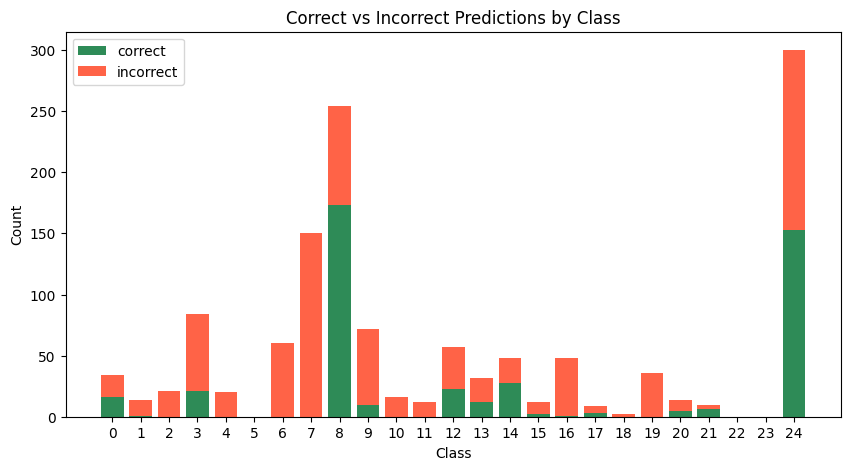

In [ ]:
#plot count of incorrect and correct

class_name =[f'{x}' for x in range(0,25)]

correct_counts = [yippee.count(i) for i in range(25)]
incorrect_counts = [sadtimes.count(i) for i in range(25)]


plt.figure(figsize=(10,5))

plt.bar(class_name, correct_counts, label= 'correct' ,color = 'seagreen')
plt.bar(class_name, incorrect_counts, bottom = correct_counts, label='incorrect', color='tomato')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Correct vs Incorrect Predictions by Class')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


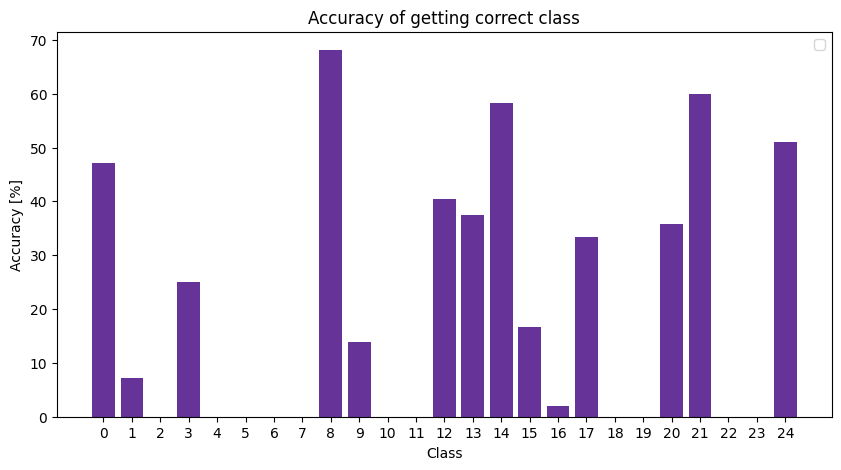

In [ ]:
#percentage of correct classes
accuracy = []

for k,j in enumerate(correct_counts):
    if correct_counts[k] >0:
        acc=correct_counts[k]*100/(correct_counts[k]+incorrect_counts[k])
        accuracy.append(acc)
    else:
        accuracy.append(0)

plt.figure(figsize=(10,5))
plt.bar(class_name, accuracy,color='rebeccapurple')
plt.xlabel('Class')
plt.ylabel('Accuracy [%]')
plt.title('Accuracy of getting correct class')
plt.legend()
plt.show()

# 3 Binary classification

In [ ]:
print(image_classes)
print(df_train)

[['0' 'apxs']
 ['1' 'apxs cal target']
 ['2' 'chemcam cal target']
 ['3' 'chemin inlet open']
 ['4' 'drill']
 ['5' 'drill holes']
 ['6' 'drt front']
 ['7' 'drt side']
 ['8' 'ground']
 ['9' 'horizon']
 ['10' 'inlet']
 ['11' 'mahli']
 ['12' 'mahli cal target']
 ['13' 'mastcam']
 ['14' 'mastcam cal target']
 ['15' 'observation tray']
 ['16' 'portion box']
 ['17' 'portion tube']
 ['18' 'portion tube opening']
 ['19' 'rems uv sensor']
 ['20' 'rover rear deck']
 ['21' 'scoop']
 ['22' 'sun']
 ['23' 'turret']
 ['24' 'wheel']]
                                           filename class
0     calibrated/0077ML0005780000102730I01_DRCL.JPG    15
1     calibrated/0072MR0005610170103642E01_DRCL.JPG     8
2     calibrated/0069MR0004130000103477I01_DRCL.JPG    21
3     calibrated/0154ML0008510010104492E01_DRCL.JPG     8
4     calibrated/0019MR0000530000100138C00_DRCL.JPG     8
...                                             ...   ...
3741  calibrated/0163ML0008760050104602D01_DRCL.JPG    10
3742  calibr

Changing 25 classes to only 2 classes (Rover and Not Rover)

In [ ]:
path_directory = "/home/ap23002/deep-learning-2024/project1/msl-images/"

#images
image_classes = np.loadtxt(path_directory + "msl_synset_words-indexed.txt", dtype=str,delimiter=',')
image_test = np.loadtxt(path_directory + "test-calibrated-shuffled.txt", dtype=str,delimiter=' ')
image_train = np.loadtxt(path_directory + "train-calibrated-shuffled.txt", dtype=str,delimiter=' ')
image_val = np.loadtxt(path_directory + "val-calibrated-shuffled.txt", dtype=str,delimiter=' ')


#dataframes
df_classes = pd.DataFrame(image_classes, columns=['filename','class'])
df_test = pd.DataFrame(image_test, columns=['filename','class'])
df_train = pd.DataFrame(image_train, columns=['filename','class'])
df_val = pd.DataFrame(image_val, columns=['filename','class'])

#but changing df to 1 or 0s

rover_class=['0','1']

no_rover = [5, 8, 9, 22]  #0

#function to convert filename or class to 1 or 0s
def convert_to_binary_filename(x):
    return '0' if int(x) in no_rover else '1'

def convert_to_binary_class(x):
    return '0' if int(x) in no_rover else '1'


for i, row in df_classes.iterrows():
    df_classes.at[i, 'filename'] = convert_to_binary_filename(row['filename'])

for i, row in df_train.iterrows():
    df_train.at[i, 'class'] = convert_to_binary_class(row['class'])

for i, row in df_test.iterrows():
    df_test.at[i, 'class'] = convert_to_binary_class(row['class'])

for i, row in df_val.iterrows():
    df_val.at[i, 'class'] = convert_to_binary_class(row['class'])


# print(df_classes)
# print(df_train)
BatchSize=100

#load the training image data
idg = ImageDataGenerator(rescale=1./255.)

#generators:
train_ds = idg.flow_from_dataframe(dataframe=df_train
                                   , directory='/home/ap23002/deep-learning-2024/project1/msl-images/'
                                   , batch_size=BatchSize
                                  , classes=rover_class)

test_ds = idg.flow_from_dataframe(dataframe=df_test
                                   , directory='/home/ap23002/deep-learning-2024/project1/msl-images/'
                                   , batch_size=BatchSize
                                 ,classes=rover_class)

val_ds = idg.flow_from_dataframe(dataframe=df_val
                                   , directory='/home/ap23002/deep-learning-2024/project1/msl-images/'
                                   , batch_size=BatchSize
                                ,classes=rover_class)

Found 3746 validated image filenames belonging to 2 classes.
Found 1305 validated image filenames belonging to 2 classes.
Found 1640 validated image filenames belonging to 2 classes.


Traion the model

In [ ]:


#train train_ds in a model

Nepochs = 7
DropoutValue = 0.5

xpix = train_ds[0][0][0].shape[0]
ypix = train_ds[0][0][0].shape[1]
zpix = train_ds[0][0][0].shape[2]#colour channels

print(xpix)
print(ypix)
print(zpix)

model = keras.models.Sequential()

model.add(keras.layers.Conv2D(32,(3,3),padding='same',activation = 'relu', input_shape= (xpix, ypix, zpix)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Dropout(DropoutValue))

model.add(keras.layers.Conv2D(32*2, (3, 3),padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Dropout(DropoutValue))

model.add(keras.layers.Conv2D(32*4, (3, 3),padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Dropout(DropoutValue))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32*5, activation='relu'))
model.add(keras.layers.Dropout(DropoutValue))

model.add(keras.layers.Dense(2, activation='sigmoid'))#ensure no. of classes matches wiith the generator




print("Input data ")
print("Dropout values       = ", DropoutValue)
print("Leaky relu parameter =  0.1")
#print("ValidationSplit      = ", ValidationSplit)
print("BatchSize            = ", BatchSize)
print("Nepochs              = ", Nepochs, "\n")
print("N(train)             = ", len(df_train))
print("N(test)              = ", len(df_test))
model.summary()

loss_fn = keras.losses.BinaryCrossentropy()#bc theyre one part categorisation

opt = keras.optimizers.Adam(learning_rate=0.001)


#model.compile(optimizer=opt, loss=loss_fn, metrics=[['accuracy'],[tf.keras.metrics.FalsePositives()],[tf.keras.metrics.FalseNegatives()],[tf.keras.metrics.TruePositives()],[tf.keras.metrics.TrueNegatives()]])
model.compile(optimizer=opt, loss=loss_fn, metrics=['accuracy', tf.keras.metrics.FalsePositives(), tf.keras.metrics.FalseNegatives(), tf.keras.metrics.TruePositives(), tf.keras.metrics.TrueNegatives()])
history  = model.fit(train_ds,validation_data=val_ds, epochs=Nepochs)


256
256
3
Input data 
Dropout values       =  0.5
Leaky relu parameter =  0.1
BatchSize            =  100
Nepochs              =  7 

N(train)             =  3746
N(test)              =  1305
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 128, 128, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0      

2024-03-04 13:37:51.425031: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-04 13:37:51.425593: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/anaconda3/envs/tf2.11/lib::/usr/lib/nvidia:/usr/local/cuda/lib64
2024-03-04 13:37:51.426624: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/anaconda3/envs/tf2.11/lib::/usr/lib/nvidia:/usr/local/cuda/lib64
2024-03-04 13:37:51.427573: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader

Epoch 1/7
38/38 [==============================] - 162s 4s/step - loss: 1.4642 - accuracy: 0.6495 - false_positives: 1252.0000 - false_negatives: 1432.0000 - true_positives: 2314.0000 - true_negatives: 2494.0000 - val_loss: 0.7071 - val_accuracy: 0.3854 - val_false_positives: 1008.0000 - val_false_negatives: 1008.0000 - val_true_positives: 632.0000 - val_true_negatives: 632.0000
Epoch 2/7
38/38 [==============================] - 161s 4s/step - loss: 0.5058 - accuracy: 0.6967 - false_positives: 1129.0000 - false_negatives: 1157.0000 - true_positives: 2589.0000 - true_negatives: 2617.0000 - val_loss: 0.6594 - val_accuracy: 0.5402 - val_false_positives: 630.0000 - val_false_negatives: 950.0000 - val_true_positives: 690.0000 - val_true_negatives: 1010.0000
Epoch 3/7
38/38 [==============================] - 162s 4s/step - loss: 0.3653 - accuracy: 0.8428 - false_positives: 518.0000 - false_negatives: 775.0000 - true_positives: 2971.0000 - true_negatives: 3228.0000 - val_loss: 0.4617 - val_ac

history keys =  dict_keys(['loss', 'accuracy', 'false_positives', 'false_negatives', 'true_positives', 'true_negatives', 'val_loss', 'val_accuracy', 'val_false_positives', 'val_false_negatives', 'val_true_positives', 'val_true_negatives'])

Display the evolution of the accuracy as a function of the training epoch


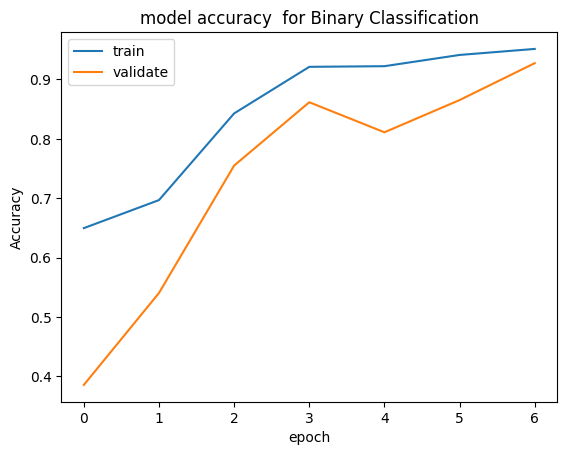


Display the evolution of the loss as a function of the training epoch


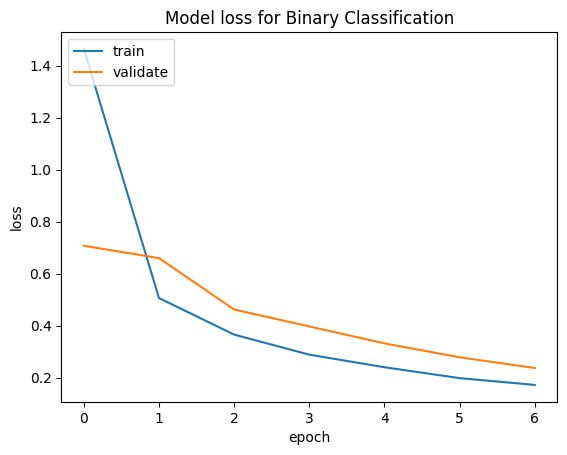


Performance summary (on test data):
14/14 - 8s - loss: 0.3793 - accuracy: 0.7985 - false_positives: 240.0000 - false_negatives: 273.0000 - true_positives: 1032.0000 - true_negatives: 1065.0000 - 8s/epoch - 583ms/step
	loss = 0.379
	accuracy = 0.798


In [ ]:
print("history keys = ", history.history.keys())

print("\n\033[1mDisplay the evolution of the accuracy as a function of the training epoch\033[0m")

#history for acc
plt.plot(history.history['accuracy']) # 'accuracy'
plt.plot(history.history['val_accuracy']) # 'val_accuracy'
plt.title('model accuracy  for Binary Classification')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()
plt.clf()


print("\n\033[1mDisplay the evolution of the loss as a function of the training epoch\033[0m")


# summarize history for loss
plt.plot(history.history['loss']) # 'loss'
plt.plot(history.history['val_loss']) # 'val_loss'
plt.title('Model loss for Binary Classification')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()


# having finished training the model, use this to evaluate the performance on a sample of test data
print("\n\033[1mPerformance summary (on test data):\033[0m")
loss, acc,fp,fn,tp,tn = model.evaluate(test_ds, verbose=2) # remember to use test set!
print("\tloss = {:5.3f}\n\taccuracy = {:5.3f}".format(loss, acc))

For false positive and true positive rate equations:

https://library.virginia.edu/data/articles/roc-curves-and-auc-for-models-used-for-binary-classification

Accuracy test

In [1]:
test_true_class = []
test_images = []

# test data into list
for i in range(len(test_ds)):
    x = test_ds[i][0]  # image file
    y = test_ds[i][1]  # true class
    test_true_class.append(y)
    test_images.append(x)

# Concatenate lists
true_class_con = np.concatenate(test_true_class)
images_con = np.concatenate(test_images)

test_predict = model.predict(images_con)

41/41 [==============================] - 7s 175ms/step


ROC curve

41/41 [==============================] - 7s 178ms/step


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


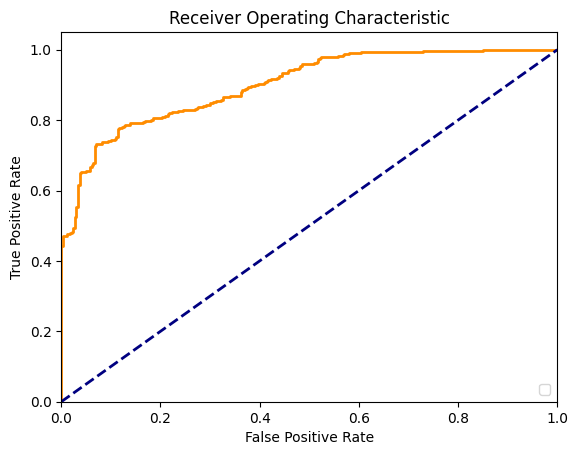

In [ ]:
from sklearn.metrics import roc_curve


test_probs = model.predict(images_con)
test_labels = np.array(true_class_con)[:, 1]



fpr, tpr, _ = roc_curve(test_labels, test_probs[:, 1])


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()